In [2]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import numpy as np
import pickle
import matplotlib

import matplotlib.pyplot as plt

import numpy as np

404 - data not found
429 - 어느정도 시간지나면 불러올 수 있음

In [3]:
api_key = 'RGAPI-9966947a-b77e-42da-a66c-12acab2f3fca'

# 소환사 랭크정보 수집

In [14]:
sohwan = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" +'hide on bush' +'?api_key=' + api_key

In [15]:
r = requests.get(sohwan)

In [16]:
r

<Response [200]>

In [18]:
r.json()['id']

'76URdjLX9GaRHd8sWHWOL4rGF_Z9kU6VPesbPBR1A-ByvA'

In [19]:
tier_url = "https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/" + r.json()['id'] +'?api_key=' + api_key

In [20]:
r2  = requests.get(tier_url)

In [22]:
r2.json()

[{'leagueId': 'b82a4a63-6fe0-34c1-96c5-bd9a7b8b8201',
  'leagueName': "Syndra's Masterminds",
  'queueType': 'RANKED_SOLO_5x5',
  'position': 'NONE',
  'tier': 'GRANDMASTER',
  'rank': 'I',
  'summonerId': '76URdjLX9GaRHd8sWHWOL4rGF_Z9kU6VPesbPBR1A-ByvA',
  'summonerName': 'Hide on bush',
  'leaguePoints': 459,
  'wins': 229,
  'losses': 239,
  'veteran': False,
  'inactive': False,
  'freshBlood': True,
  'hotStreak': False}]

#그랜드마스터 게임 기록 -api를 이용해서 url을 뽑기 위해서는 api를 아래와 같이 입력하여 request로 받는다.

In [4]:
grandmaster = 'https://kr.api.riotgames.com/lol/league/v4/grandmasterleagues/by-queue/RANKED_SOLO_5x5?api_key=' + api_key

In [5]:
r = requests.get(grandmaster)

In [6]:
r

<Response [200]>

In [7]:
league_df = pd.DataFrame(r.json())

In [10]:
league_df.head()

,tier,freshBlood,hotStreak,inactive,leaguePoints,losses,summonerId,summonerName,veteran,wins
0,GRANDMASTER,False,True,False,632,413,8Lh2YFNNZWxPoJtQ4n9myO8XL8MLtm6O9yClMmQH_YbIRII,Masquerade Lies,True,454
1,GRANDMASTER,False,False,False,305,401,4sHLGZlyjilby44sQA18VP_ZK0ncenjo69cL6aE8hOpcR_U,해강고 원딜,False,399
2,GRANDMASTER,False,False,False,289,489,e0FUeLo0F_Q1wNTE12ly9-GaUaP3oN2fJG6tU9Eksd_kpjc,Winnie13ear,True,497
3,GRANDMASTER,False,False,False,407,249,vr68M2OszLTqk4Jbc47ToLQUYlkeCpMUhx5So6DVmc35sQ,C5o349r36n,True,280
4,GRANDMASTER,False,False,False,497,235,iNZZbJm6SH3fgENruxK8D7avnVGeh7FpSnIioZOzI5KZ2A,노력하면길이보여,False,228


In [9]:
league_df.reset_index(inplace=True)
league_entries_df = pd.DataFrame(dict(league_df['entries'])).T
league_df = pd.concat([league_df, league_entries_df], axis=1)

league_df = league_df.drop(['index', 'queue', 'name', 'leagueId', 'entries', 'rank'], axis=1)
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
tier            700 non-null object
freshBlood      700 non-null object
hotStreak       700 non-null object
inactive        700 non-null object
leaguePoints    700 non-null object
losses          700 non-null object
summonerId      700 non-null object
summonerName    700 non-null object
veteran         700 non-null object
wins            700 non-null object
dtypes: object(10)
memory usage: 54.8+ KB


In [36]:
league_df.to_csv('그마데이터.csv',index=False,encoding = 'cp949')

In [40]:
league_df = league_df.drop(columns='account_id')

In [52]:
league_df['account_id'] = np.nan

In [11]:
sohwan = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/' + league_df['summonerName'].iloc[15] + '?api_key=' + api_key

In [12]:
r = requests.get(sohwan)

In [13]:
r

<Response [200]>

In [14]:
r.json()

{'id': 'ZpvrCspYtI5ATA0ECX9EZWbMhgiv4zhk6Z-4T1jJfvqxWos',
 'accountId': 'b40jF9oAYduAsYREIuCAZZ9klHGGOhrI4oHDbW321H6zzwU',
 'puuid': 'TCXCdRz35yQ2mXkE4frZLOXIkeTd7NW6ZjyqhjadAQ6-1Fpq1tirTuzbK6zTexazlKHjQ4NTZcfgvQ',
 'name': 'chi ma ni zhon',
 'profileIconId': 4154,
 'revisionDate': 1559277059000,
 'summonerLevel': 166}

In [50]:
account_id = r.json()['accountId']
league_df.iloc[0, -1] = account_id

In [53]:
league_df

,tier,freshBlood,hotStreak,inactive,leaguePoints,losses,summonerId,summonerName,veteran,wins,account_id
0,GRANDMASTER,False,False,False,214,319,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,N4talie,True,317,NaN
1,GRANDMASTER,False,False,False,411,143,QIh8n_S_GDCyRGMU6oI58p4W3hnpaHS5ZqXq2PrfA96z0GY,xiao jiang jiang,True,230,NaN
2,GRANDMASTER,True,False,False,267,149,IT5EyEMtZuXtqfXyw7MrSaClmIXZJCZ1qvPMvRP0UVOXGNY,RuiRui9,False,192,NaN
3,GRANDMASTER,True,False,False,207,209,24ApOP9y-OvAArROqOjt-l2Ibj7xbdwv-Izmi3uft3wuH0s,BludX,False,243,NaN
4,GRANDMASTER,False,False,False,269,50,Yk7riyXR5fky3hLLrJhmOCKWfaHDXOQTmwyKzuERCQ-Cvg,금민관,False,52,NaN
5,GRANDMASTER,False,True,False,352,273,Ff1EB2ZA8LKabiu8kd7dOlOtMOfQrmYiitJlCpxTdcb7wLg,AF TV 최현욱,True,292,NaN
6,GRANDMASTER,True,False,False,604,428,fRfcb_2VLV9kHmcD77d_cnCLYDCJ2feUaGeefGp7S3MIrng,Iron Man9,False,430,NaN
7,GRANDMASTER,True,False,False,300,240,-7gOuZ52RRXFaQseUQsPqa501eY7qFQGmbCBJP2jGMwSQ4w,와숨막히네,False,311,NaN
8,GRANDMASTER,False,False,False,205,107,bEKvCvC_9dbiR0BlovqWYr_am1nLpgERQLb7yjZ8h20lwk0,Cheoli T 3 T,False,149,NaN
9,GRANDMASTER,True,False,False,587,194,MHGNpVILjrQIbFwX7TM9sFRT70vKecLFono6fQIc3BWpenU,wrsIt,False,272,NaN


In [94]:
for i in range(len(league_df)):
    try:
        sohwan = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/' + league_df['summonerName'].iloc[i] + '?api_key=' + api_key 
        r = requests.get(sohwan)
        
        while r.status_code == 429:
            time.sleep(5)
            sohwan = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/' + league_df['summonerName'].iloc[i] + '?api_key=' + api_key 
            r = requests.get(sohwan)
            
        account_id = r.json()['accountId']
        league_df.iloc[i, -1] = account_id
    
    except:
        pass
        

In [95]:
league_df

,tier,freshBlood,hotStreak,inactive,leaguePoints,losses,summonerId,summonerName,veteran,wins,account_id
0,GRANDMASTER,False,False,False,214,319,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,N4talie,True,317,xGk6hmYH1xpSIg8dPG7yIx82He4dL_GLkHFN1kVl6MCmjWA
1,GRANDMASTER,False,False,False,411,143,QIh8n_S_GDCyRGMU6oI58p4W3hnpaHS5ZqXq2PrfA96z0GY,xiao jiang jiang,True,230,v0RIh003Mn4Lv-eCJN66vV7oZJeDQ8Le_r_q-4fEpaS57m...
2,GRANDMASTER,True,False,False,267,149,IT5EyEMtZuXtqfXyw7MrSaClmIXZJCZ1qvPMvRP0UVOXGNY,RuiRui9,False,192,cE89c2sACehP-3EcZZfdB2_cFD65BBUGBgonUVply6YIyrA
3,GRANDMASTER,True,False,False,207,209,24ApOP9y-OvAArROqOjt-l2Ibj7xbdwv-Izmi3uft3wuH0s,BludX,False,243,p7np1TZuYvZ3ZAJoYD2roBVhjXjw3MlPXqeZd-Fn2NVffwk
4,GRANDMASTER,False,False,False,269,50,Yk7riyXR5fky3hLLrJhmOCKWfaHDXOQTmwyKzuERCQ-Cvg,금민관,False,52,f4s2y5yfyUcIxXPuzHJxfSqa655NjmnP2TWHnuOeqQ-a
5,GRANDMASTER,False,True,False,352,273,Ff1EB2ZA8LKabiu8kd7dOlOtMOfQrmYiitJlCpxTdcb7wLg,AF TV 최현욱,True,292,Y04KFrBXdm2IAodkPnz3ps31jQlIo8tng0T0TeuQGpjXOh...
6,GRANDMASTER,True,False,False,604,428,fRfcb_2VLV9kHmcD77d_cnCLYDCJ2feUaGeefGp7S3MIrng,Iron Man9,False,430,3BdsrJVOg_IuNr0dnntN8aK-qVC6_gDkT6ZUZl8sQRiThf...
7,GRANDMASTER,True,False,False,300,240,-7gOuZ52RRXFaQseUQsPqa501eY7qFQGmbCBJP2jGMwSQ4w,와숨막히네,False,311,e-UMytrxCbqRQTNnGHJVPEbixTcLJPSvsx6r4E6Xb8a4OM...
8,GRANDMASTER,False,False,False,205,107,bEKvCvC_9dbiR0BlovqWYr_am1nLpgERQLb7yjZ8h20lwk0,Cheoli T 3 T,False,149,Ekl_WjogbkmMfIpOGi5hZYfs6WY7K0zHNFqtxwzdn5N4F40
9,GRANDMASTER,True,False,False,587,194,MHGNpVILjrQIbFwX7TM9sFRT70vKecLFono6fQIc3BWpenU,wrsIt,False,272,RXMr9fXFwqeyPTiczVoQNFZzU0rP2S2eVYszSGZWmG6z6ek


In [96]:
league_df2 = league_df.fillna('request403')

In [100]:
league_df3 = league_df2[league_df2['account_id']!='request403']

In [115]:
league_df3.to_csv('accountid데이터.csv',index = False,encoding='cp949')

### 매치데이터

#accountid를 이용하여 매치데이터 불러오기 -> 최종적으로는 gameid를 이용한 매치 데이터가 필요하므로 gameid를 먼저 불러오자

In [114]:
match_info_df = pd.DataFrame()

In [102]:
league_df3['account_id'].iloc[0]

'xGk6hmYH1xpSIg8dPG7yIx82He4dL_GLkHFN1kVl6MCmjWA'

In [103]:
season = str(13)

In [104]:
api_url = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/' + league_df3['account_id'].iloc[0]  +'?season=' + season + '&api_key=' + api_key

In [106]:
r = requests.get(api_url)

<Response [200]>

In [109]:
pd.DataFrame(r.json()['matches'])

,champion,gameId,lane,platformId,queue,role,season,timestamp
0,203,3676857460,JUNGLE,KR,420,NONE,13,1558785426058
1,64,3676779762,JUNGLE,KR,420,NONE,13,1558783247340
2,80,3676791079,JUNGLE,KR,420,NONE,13,1558780818696
3,5,3676754305,NONE,KR,420,DUO_SUPPORT,13,1558778815052
4,64,3676659344,JUNGLE,KR,420,NONE,13,1558777205059
5,64,3676683201,JUNGLE,KR,420,NONE,13,1558775354424
6,60,3676589494,NONE,KR,420,DUO_SUPPORT,13,1558774186184
7,60,3676574309,NONE,KR,420,DUO_SUPPORT,13,1558772618488
8,113,3676494716,JUNGLE,KR,420,NONE,13,1558769857015
9,203,3676008608,JUNGLE,KR,420,NONE,13,1558758490269


In [112]:
match_info_df = pd.concat([match_info_df, pd.DataFrame(r.json()['matches'])])

In [117]:
#13시즌의 데이터만을 이용할 것이며 league_df3 => 기존에 수집한 account_id가 있는 league_df
match_info_df = pd.DataFrame()
season = str(13)
for i in range(len(league_df3)):
    try:
        match0 = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/' + league_df3['account_id'].iloc[i]  +'?season=' + season + '&api_key=' + api_key
        r = requests.get(match0)
        
        while r.status_code == 429:
            time.sleep(5)
            match0 = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/' + league_df3['account_id'].iloc[i]  +'?season=' + season + '&api_key=' + api_key
            r = requests.get(match0)
            
        match_info_df = pd.concat([match_info_df, pd.DataFrame(r.json()['matches'])])
    
    except:
        print(i)

In [3]:
match_info_df

,champion,gameId,lane,platformId,queue,role,season,timestamp
0,203,3676857460,JUNGLE,KR,420,NONE,13,1558785426058
1,64,3676779762,JUNGLE,KR,420,NONE,13,1558783247340
2,80,3676791079,JUNGLE,KR,420,NONE,13,1558780818696
3,5,3676754305,NONE,KR,420,DUO_SUPPORT,13,1558778815052
4,64,3676659344,JUNGLE,KR,420,NONE,13,1558777205059
5,64,3676683201,JUNGLE,KR,420,NONE,13,1558775354424
6,60,3676589494,NONE,KR,420,DUO_SUPPORT,13,1558774186184
7,60,3676574309,NONE,KR,420,DUO_SUPPORT,13,1558772618488
8,113,3676494716,JUNGLE,KR,420,NONE,13,1558769857015
9,203,3676008608,JUNGLE,KR,420,NONE,13,1558758490269


In [ ]:
match_info_df.to_csv('매치1.csv',index=False,encoding='cp949')

In [2]:
match_info_df = pd.read_csv('매치1.csv',engine= 'python')

# gameid중복제거한 뒤 경기정보 불러오기

In [10]:
len(match_info_df2)

33130

In [3]:
match_info_df2 = match_info_df.drop_duplicates('gameId')

In [5]:
match_df = pd.DataFrame()

In [5]:
api_url = 'https://kr.api.riotgames.com/lol/match/v4/matches/' + str(match_info_df2['gameId'].iloc[0]) + '?api_key=' + api_key

In [6]:
r = requests.get(api_url)

In [48]:
r = requests.get(api_url,headers = {'user-agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'
                                                                            'Chrome/71.0.3578.98 Safari/537.36')})

In [50]:
r

<Response [403]>

In [10]:
pd.DataFrame(list(r.json().values()), index=list(r.json().keys())).T

,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,teams,participants,participantIdentities
0,3676857460,KR,1558785426058,1274,420,11,13,9.10.274.8345,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."


In [ ]:
match_df = pd.DataFrame()

In [269]:
match_df = match_df2

In [308]:
match_fin.index = range(len(match_fin))

In [309]:
match_fin

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status,teams
0,1558785426058,1274,3676857460,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
1,1558783247340,1720,3676779762,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
2,1558780818696,2029,3676791079,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
3,1558778815052,917,3676754305,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
4,1558777205059,1228,3676659344,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
5,1558775354424,1461,3676683201,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
6,1558774186184,872,3676589494,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
7,1558772618488,924,3676574309,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
8,1558769857015,1997,3676494716,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
9,1558758490269,1295,3676008608,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."


In [316]:
for i in range(10000,20000):
    try:
        if i == 10000:
            time.sleep(400)
        
        if i == 11000:
            time.sleep(400)
            
        if i == 12000:
            time.sleep(400)
        
        if i == 13000:
            time.sleep(400)
        
        if i == 14000:
            time.sleep(400)
        if i == 15000:
            time.sleep(400)
        if i == 16000:
            time.sleep(400)
        if i == 17000:
            time.sleep(400)
        if i == 18000:
            time.sleep(400)
        if i == 19000:
            time.sleep(400)            
        api_url='https://kr.api.riotgames.com/lol/match/v4/matches/' + str(match_info_df2['gameId'].iloc[i]) + '?api_key=' + api_key
        r = requests.get(api_url)

        while r.status_code == 429:
            time.sleep(2)
            #time.sleep를 꼭 해줘야함 안그러면 request 잦은 사용으로 블랙리스트가 됨
            api_url='https://kr.api.riotgames.com/lol/match/v4/matches/' + str(match_info_df2['gameId'].iloc[i]) + '?api_key=' + api_key
            r = requests.get(api_url)
        
        mat = pd.DataFrame(list(r.json().values()), index=list(r.json().keys())).T
        match_fin = pd.concat([match_fin,mat])

    except:
        pass    

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



In [317]:
match_fin.index = range(len(match_fin))

In [318]:
with open('임의저장2.pickle','wb') as f:
    pickle.dump(match_fin,f,pickle.HIGHEST_PROTOCOL)

In [31]:
na_ls = list(match_dff.fillna('requestx')[match_dff.fillna('requestx')['gameDuration']=='requestx'].index)

In [33]:
match_dff = match_dff.drop(index=na_ls)

In [38]:
match_fin = pd.concat([match_dff,data])

In [332]:
match_fin = match_fin.head(17500)

In [333]:
match_fin

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status,teams
0,1558785426058,1274,3676857460,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
1,1558783247340,1720,3676779762,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
2,1558780818696,2029,3676791079,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
3,1558778815052,917,3676754305,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
4,1558777205059,1228,3676659344,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
5,1558775354424,1461,3676683201,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
6,1558774186184,872,3676589494,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
7,1558772618488,924,3676574309,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
8,1558769857015,1997,3676494716,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
9,1558758490269,1295,3676008608,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."


In [334]:
with open('롤17500개.pickle','wb') as f:
    pickle.dump(match_fin,f,pickle.HIGHEST_PROTOCOL)

In [280]:
match_df.index = range(len(match_df))

In [281]:
match_df

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status,teams
0,1.55879e+12,1274,3.67686e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
1,1.55878e+12,1720,3.67678e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
2,1.55878e+12,2029,3.67679e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
3,1.55878e+12,917,3.67675e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
4,1.55878e+12,1228,3.67666e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
5,1.55878e+12,1461,3.67668e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
6,1.55877e+12,872,3.67659e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
7,1.55877e+12,924,3.67657e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
8,1.55877e+12,1997,3.67649e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
9,1.55876e+12,1295,3.67601e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."


# pickle을 활용한 데이터 type저장

In [362]:
match_df2 = match_df.iloc[2100:,:]

In [371]:
match_df2.index = range(len(match_df2))

In [372]:
import pickle

with open('data.pickle','wb') as f:
    pickle.dump(match_df2,f,pickle.HIGHEST_PROTOCOL)

In [36]:
with open('data.pickle','rb') as f:
    data = pickle.load(f)

In [37]:
data

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status,teams
0,1558136356934,2012,3665928692,CLASSIC,MATCHED_GAME,9.10.273.9316,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
1,1558134176964,1443,3665907691,CLASSIC,MATCHED_GAME,9.10.273.9316,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
2,1558034665393,1726,3664466395,ARAM,MATCHED_GAME,9.10.273.9316,12,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,450,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
3,1557922186466,2035,3662600644,CLASSIC,MATCHED_GAME,9.10.273.9316,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,430,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
4,1557694845761,1309,3659287929,ARAM,MATCHED_GAME,9.9.272.4950,12,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,450,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
5,1557692338666,2074,3659286913,CLASSIC,MATCHED_GAME,9.9.272.4950,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,430,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
6,1557689210885,2086,3659343212,CLASSIC,MATCHED_GAME,9.9.272.4950,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,430,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
7,1557598756354,1423,3657692882,ARAM,MATCHED_GAME,9.9.272.4950,12,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,450,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
8,1557587813973,1185,3657502389,ARAM,MATCHED_GAME,9.9.272.4950,12,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,450,13,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
9,1557507846497,1069,3655684988,CLASSIC,MATCHED_GAME,9.9.272.4950,11,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,430,13,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."


# 수집한 데이터 저장 갱신

In [282]:
match_df2 = match_df

In [45]:
match_df2 = match_df.head(2150)

In [293]:
match_df2.to_csv('매치분석데이터.csv',index=False,encoding='cp949',mode='w') #타입 그대로 저장하는 방법

In [341]:
match_df2 = pd.read_csv('매치분석데이터.csv',engine='python', dtype='unicode')

In [347]:
match_df2

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status,teams
0,1.558785e+12,1274.0,3.676857e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
1,1.558783e+12,1720.0,3.676780e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
2,1.558781e+12,2029.0,3.676791e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
3,1.558779e+12,917.0,3.676754e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
4,1.558777e+12,1228.0,3.676659e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
5,1.558775e+12,1461.0,3.676683e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
6,1.558774e+12,872.0,3.676589e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."
7,1.558773e+12,924.0,3.676574e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
8,1.558770e+12,1997.0,3.676495e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
9,1.558758e+12,1295.0,3.676009e+09,CLASSIC,MATCHED_GAME,9.10.274.8345,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."


# 팀 데이터로 데이터 화

In [3]:
with open('롤17500개.pickle','rb') as f:
    data = pickle.load(f)

In [4]:
data.index = range(len(data))

In [5]:
#챔피언아이디를 제외하고 딕셔너리를 뽑는다
a_ls = list(data['teams'])

#### team1

In [6]:
team1_df = pd.DataFrame()
for i in range(len(a_ls)):
    try:
        a_ls[i][0].pop('bans',None)
        team1 = pd.DataFrame(list(a_ls[i][0].values()),index = list(a_ls[i][0].keys())).T
        team1_df = team1_df.append(team1)
    except:
        pass
    
team1_df.index = range(len(team1_df))

In [7]:
len(team1_df)

17484

#### team2

In [8]:
team2_df = pd.DataFrame()
for i in range(len(a_ls)):
    try:
        a_ls[i][1].pop('bans',None)
        team2 = pd.DataFrame(list(a_ls[i][1].values()),index = list(a_ls[i][1].keys())).T
        team2_df = team2_df.append(team2)
    except:
        pass
    
team2_df.index = range(len(team2_df))

C:\Users\tlsal\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [9]:
len(team2_df)

17484

#### duration

In [53]:
data[['gameDuration']]

,gameDuration
0,1274
1,1720
2,2029
3,917
4,1228
5,1461
6,872
7,924
8,1997
9,1295


# 최종 team데이터

In [10]:
data_team = pd.concat([team1_df,team2_df,data[['gameDuration']]],axis=1)

In [36]:
data_team2 = pd.concat([team1_df,data[['gameDuration']]],axis=1) #분석을 위해서 상대편데이터는 일단 빼고

In [66]:
with open('team_data.pickle','wb') as f:
    pickle.dump(data_team,f,pickle.HIGHEST_PROTOCOL)

In [12]:
with open('team_data2.pickle','wb') as f:
    pickle.dump(data_team2,f,pickle.HIGHEST_PROTOCOL)

In [3]:
df_team = pd.read_pickle('team_data2.pickle') 

# parcitipants 데이터 화

#### 각 소환사별 정보 데이터

In [86]:
need = list(data['participants'].iloc[0][8]['stats'].keys())

In [98]:
matchers = ['assists','deaths','goldEarned','item','kills','minionKilled','totalDamageDealt','totalDamageDealtToChampions','totalDamageTaken','totalHeal','totalTimeCrowdControlDealt','wardsPlaced']

In [99]:
size = [s for s in need if any(xs in s for xs in matchers)]

In [106]:
'item' in size[0]

True

In [114]:
part_ls = []
part2_ls = []
item0 = []
for i in range(len(size)):
    if 'item' in size[i]:
        item0.append(size[i])
    else:
        part_ls.append(size[i])

In [120]:
part_ls2 = [item0] + part_ls

In [124]:
part2_ls = []
item1 = []
for i in range(len(size)):
    if 'item' in size[i]:
        item1.append(data['participants'].iloc[0][8]['stats'][size[i]])
    else:
        part2_ls.append(data['participants'].iloc[0][8]['stats'][size[i]])

In [126]:
part2_ls2 = [item1] + part2_ls

### 소환사아이디코드 / 챔피언코드

In [67]:
list_part_champ_columns = [ 'championId_'+ str(i) for i in range(10)]
list_part_summoner_columns = [ 'summonerId_'+ str(i) for i in range(10)]

In [154]:
data['participantIdentities'].iloc[0][2]['player']['summonerName']

'루즈한 라인전'

In [142]:
champ1 = []
for i in range(len(data)):
    champ0 = []
    for j in range(len(data['participants'].iloc[i])):
        champ0.append(data['participants'].iloc[i][j]['championId'])
        
    champ1.append(champ0)

In [155]:
summor1 = []
summor2 = []
for i in range(len(data)):
    summor0 = []
    summor00 = []
    for j in range(len(data['participantIdentities'].iloc[i])):
        summor0.append(data['participantIdentities'].iloc[i][j]['player']['summonerId'])
        summor00.append(data['participantIdentities'].iloc[i][j]['player']['summonerName'])
        
    summor1.append(summor0)
    summor2.append(summor00)

In [159]:
champ_df = pd.DataFrame(champ1,columns = list_part_champ_columns)

In [161]:
sohwan1_df = pd.DataFrame(summor1,columns = list_part_summoner_columns)

In [162]:
sohwan2_df = pd.DataFrame(summor2,columns = list_part_summoner_columns)

In [166]:
part_df = pd.concat([champ_df,sohwan1_df],axis=1)

In [168]:
with open('participants.pickle','wb') as f:
    pickle.dump(part_df,f,pickle.HIGHEST_PROTOCOL)

# 챔피언 정보 불러오기

In [169]:
with urllib.request.urlopen('http://ddragon.leagueoflegends.com/cdn/6.24.1/data/en_US/champion.json') as response:
    champion_info = json.loads(response.read().decode('utf8'))

In [188]:
data_champion_info = champion_info['data']

In [189]:
list_stats_columns = list(data_champion_info['Ryze']['stats'].keys())
list_info_columns = list(data_champion_info['Ryze']['info'].keys())

In [191]:
df_champion_key = pd.DataFrame({
    "key":[float(value['key']) for key, value in data_champion_info.items()]
})

In [192]:
#key데이터 생성
df_champion_info = pd.DataFrame()
start_time = time.time()
for j in range(len(data_champion_info)):
    s7 = pd.Series([list(value['info'].values()) for key, value in data_champion_info.items()][j], index=list_info_columns)
    df_champion_info = df_champion_info.append(s7, ignore_index=True)

In [194]:
# stats 데이터 프레임 만들기
df_champion_stats = pd.DataFrame()
start_time = time.time()
for j in range(len(data_champion_info)):
    s6 = pd.Series([list(value['stats'].values()) for key, value in data_champion_info.items()][j], index=list_stats_columns)
    df_champion_stats = df_champion_stats.append(s6, ignore_index=True)

18.125519037246704s
0.30817484855651855s


In [196]:
df_champions = pd.concat([df_champion_key, df_champion_info, df_champion_stats], axis=1)

In [198]:
with open('챔피언정보.pickle','wb') as f:
    pickle.dump(df_champions,f,pickle.HIGHEST_PROTOCOL)

# 분석 시작
A팀의 데이터로만 분석  
예측하려는 종속 변수인 승/패는 대칭적인 변수임

In [25]:
data_team2 = data_team2.dropna(axis=0)

In [27]:
data_team2 = data_team2[list(data_team2.columns)[2:]]

#### 모델링을 위한 라벨링

In [30]:
from sklearn.preprocessing import LabelEncoder
for i in range(0,6):
    le = LabelEncoder()
    y = list(data_team2.iloc[:,i])
    
    le.fit(y)
    y2 = le.transform(y) 
    
    data_team2.iloc[:,i] = y2

In [ ]:
le.inverse_transform(y2) #디코더

#### dictionary와 map함수를 이용한 라벨링

In [28]:
dict_winner = {False : 0, True: 1}

In [29]:
data_team2['firstBlood'] = data_team2['firstBlood'].map(dict_winner)

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
data_team2['firstTower'] = data_team2['firstTower'].map(dict_winner)

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_team2['firstInhibitor'] = data_team2['firstInhibitor'].map(dict_winner)

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
data_team2['firstBaron'] = data_team2['firstBaron'].map(dict_winner)

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
data_team2['firstDragon'] = data_team2['firstDragon'].map(dict_winner)

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
data_team2['firstRiftHerald'] = data_team2['firstRiftHerald'].map(dict_winner)

C:\Users\tlsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
dict_winner2 = {"Win" : 0, "Fail": 1}

### RF

In [37]:
data_team = data_team.dropna(axis=0)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_team2, np.array(data_team['win'].map(dict_winner2).tolist()), test_size=0.25, stratify=np.array(data_team['win'].map(dict_winner2).tolist()), random_state=123456)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train) #소환사 코드를 float로 바꿔줘야함 일단 team으로 예측해볼까?

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [40]:
#데이터를 더 수집했더니 정확도가 하락했네
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.866
Mean accuracy score: 0.869


In [46]:
clf_rf = RandomForestClassifier()


In [47]:
clf_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_pred = clf_rf.predict(X_test)

In [49]:
print("테스트 정확도: {}".format(accuracy_score(y_test, y_pred)) )

테스트 정확도: 0.8701625830089306


### GBC(Gradient Boosting classifier)

overfitting를 막기 위한 boosting기반 학습
1. 학습량을 늘린다
2. 학습률을 낮춘다
3. 트리의 깊이를(max_depth)낮춰 pre-pruning을 강하게 한다.
이와 같은 방법으로 학습 시키는 것은 모델의 복잡도를 감소시키므로 train 세트의 정확도를 낮출 수 있다.

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
clf_gbc = GradientBoostingClassifier()

In [52]:
clf_gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [53]:
y_pred = clf_gbc.predict(X_test)

In [54]:
print('정확도 = ' + str(accuracy_score(y_test,y_pred)))

정확도 = 0.8813831005266773


# xgboost

In [22]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot



In [45]:
xgb_model.fit(X_train,y_train)
#booster: 어떤 부스터 구조를 쓸지 결정한다. 이것은 gbtree, gblinear, dart가 있다.
#nthread: 몇 개의 쓰레드를 동시에 처리하도록 할지 결정한다. 디폴트는 “가능한 한 많이”.
#num_feature: feature 차원의 숫자를 정해야 하는 경우 옵션을 세팅한다. 디폴트는 “가능한 한 많이.”

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [41]:
#xgb로 학습시키기 위해서는 dtypes이 단순하게 int형식이면 안된다. 따라서 데이터 형식을 float로 변환시켜줘야함
X_train[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'gameDuration']] = X_train[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'gameDuration']].astype('float')

#xgb로 학습시키기 위해서는 dtypes이 단순하게 int형식이면 안된다. 따라서 데이터 형식을 float로 변환시켜줘야함
X_test[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'gameDuration']] = X_test[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore', 'gameDuration']].astype('float')

xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print('테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))#정확도 계산

C:\Users\tlsal\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


테스트 정확도 = 0.8832150217540645


C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### xgboosting 알고리즘 변수중요도

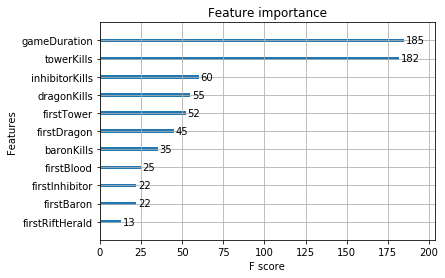

In [44]:
plot_importance(xgb_model)
pyplot.show()

# 모델의 변수 중요도 시각화
https://woolulu.tistory.com/22?category=778360

#### 부스팅기반 알고리즘의 변수 중요도

In [55]:
gbc = GradientBoostingClassifier(max_depth=1, random_state=0)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [60]:
n_feature = data_team2.shape[1]

index=np.arange(n_feature)

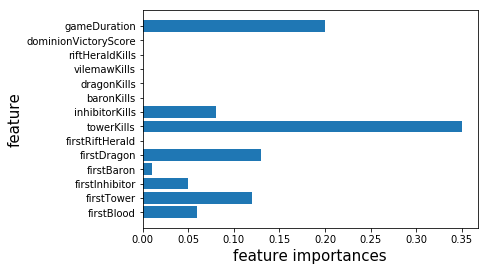

In [67]:
plt.barh(index, gbc.feature_importances_, align='center')

plt.yticks(index, list(data_team2.columns))

plt.xlabel('feature importances', size=15)

plt.ylabel('feature', size=15)

plt.show() 

#### 배깅, 트리기반 알고리즘 변수중요도

In [72]:
clf_rf = RandomForestClassifier(max_depth=1,random_state=0)
clf_rf.fit(X_train, y_train)
n_feature = data_team2.shape[1]

index=np.arange(n_feature)

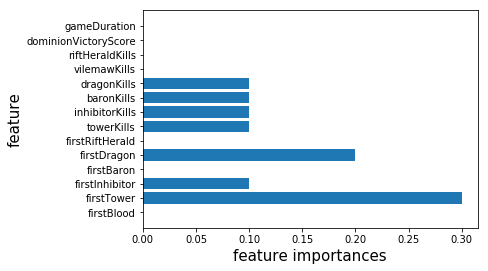

In [73]:
plt.barh(index, clf_rf.feature_importances_, align='center')

plt.yticks(index, list(data_team2.columns))

plt.xlabel('feature importances', size=15)

plt.ylabel('feature', size=15)

plt.show() 

In [ ]:
#일단 변수중요도로 나온 컬럼의 갯수와 기존의 데이터와 컬럼갯수가 같음

In [1]:
list(data_team2.columns)[i]

NameError: name 'data_team2' is not defined

In [ ]:
#만약 변수중요도로 만든 데이터프레임이 df1 / 기존의 데이터프레임은 df2
for i in range(len(list(df1.columns))):
    if df1['변수중요도'].iloc[i] == 0:
        df2 = df2.drop(list(df2.columns)[i],axis=1)#list(data_team2.columns)[i]->컬럼명임
    else:
        pass

### participants 데이터로 예측하기 하지만 소환사id가 유니코드화되어있어서 다른 방법 강구

In [251]:
team_df['win'] = data_team['win'].map(dict_winner)

In [258]:
np.array(data_team['win'].map(dict_winner).tolist())

array([1, 0, 0, ..., 1, 1, 1])

In [223]:
dict_winner = {"Win" : 0, "Fail": 1}

In [205]:
 # 학습 클래스 데이터
dict_winner = { 0: '200', 1: '100'}
y_train  = data_team['win'].map(dict_winner)

AttributeError: 'DataFrame' object has no attribute 'map'

In [255]:
part_df[list(part_df.columns)[:-1]]

,championId_0,championId_1,championId_2,championId_3,championId_4,championId_5,championId_6,championId_7,championId_8,championId_9,summonerId_0,summonerId_1,summonerId_2,summonerId_3,summonerId_4,summonerId_5,summonerId_6,summonerId_7,summonerId_8,summonerId_9
0,24,22,412,421,55,266,203,555,45,8,RRpt2FuySEtey0-gdYRvY3u8grfMClcVaie37exdClE37PI,xHokPwM1MGmhGUo1YBCVfrgkif1GN80Xzu5ICOn01ZEKvg,aOFBSxok-yBl5L5DtPLNn5PYz8n1cAMfANEwodGBbqLbrdw,s4kWDDFC5eso0v8CUAModk9JPPCnrjTyEwS0U8f5DArbTvc,fulxG9XZvw2Hqt2PxBe3f-GWceEbWxzf1542rDeVLBXdCLQ,E19ja9pjXZIeM7GW96EaoeiyS10FU_HaOtRPHWP9qQH4Ug,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,JGaGAX3-ievnFqoliIEZPd5_L_awyqe4OvmeawHnv7Hw7tg,v-xzZ36UThRspcZgabIFJbI8YAMoS93lfdFBBxxWPZAX8DA,Ul_-biikhTt37eJ4tH3ei6WJkI57euWxK2gAVnNb89MMOWg
1,67,58,142,64,555,497,55,145,266,421,DuJyJOj7Y4Zm8NW0o9nBMRaiAHviwfdtLSO1L0NF2pEITVA,a1lQ9QBLAYfGPxKuJh1_afBJzszfVfCiRHXZyjo6QFl5yA,j1gkUXrrdOoZxPQ1ihntEWTGMm--r2ULBa2OIslHdPVAMEM,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,JGaGAX3-ievnFqoliIEZPd5_L_awyqe4OvmeawHnv7Hw7tg,QqezPAO2iQapvDADid6tWii2dkEMBSFaiC_wkCKq_Nw-gw,fulxG9XZvw2Hqt2PxBe3f-GWceEbWxzf1542rDeVLBXdCLQ,8Ady_Z4XiDtQa69ksUkwCTf_sbhIG1Ih_QVIna0aBdAX7Ho,E19ja9pjXZIeM7GW96EaoeiyS10FU_HaOtRPHWP9qQH4Ug,mU9-h4DSDBSMADEoE-CVJR3Jo5iFJe6N5UmvI_IBRFLMuu4
2,44,11,164,15,25,517,80,43,236,555,wZ4z7wXylTieqYtjGYL58RklZ6bc8v5DZN8HQfTIw_dqr6M,iG5BEYbzLwDK34h-qHaIGkfSPOrEDN7b-XwWHVEVqZjMWwI,3yBS4Y_HXRlRoaDX6IWKl7nX68tIwdlDLUVpKbxjyRTNDWE,jmSNNeTimMzpLG7D3ZP6SfiYyhTa_spJfV3JH35Ex8KsF4s,EuxBoCFlBT0ODpvd5zo3a6sPS4iH835Mpu55PG7yMkEqpw,dupvk13LTeffDJuyv9anL_WDbfRKIjaM105uCrRtyKPX-9I,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,JGaGAX3-ievnFqoliIEZPd5_L_awyqe4OvmeawHnv7Hw7tg,EdYOqfvLOmqM76lYtCO8yfnPPS7AAHteDXoryi0LXkAx7Q,a1lQ9QBLAYfGPxKuJh1_afBJzszfVfCiRHXZyjo6QFl5yA
3,98,68,5,43,67,39,113,497,30,81,yjf1Ls3hGfQs83AuiwK0pDT2AAQsGyZFv2Wt2ssHoK9Ko8Y,oj9OaAPKa2g5wYijZ_QASCPsS2sLhUDWBoab5ZGaQdzY0A,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,JGaGAX3-ievnFqoliIEZPd5_L_awyqe4OvmeawHnv7Hw7tg,bOW1e74h7F0REPzWKVfQpZUA4npWOp1WPkVA-suO950WuRA,ouISBLPVIAoi_mxCr9hhTPpLa3zbA4_KY7Uaw5b6SEqElH0,7ejEke-_9HjbaiYkFZAe4Bs2Hum67X1WwLTvKdRE2hvgTGI,3ZR49eqz1Vk6hTxEYZyiomiDyPIhgQXf0lh-rceFCwP7Dg,4vkEy0W6E2ImOQEMWruZAyT3u1RCEcheYNT5C__JIFGLYjE,uiOAVGibt7dFq2GH4ogol5hkLTeI8UIXVFil1-u9btmr7No
4,98,30,266,12,81,84,64,555,68,39,RRpt2FuySEtey0-gdYRvY3u8grfMClcVaie37exdClE37PI,f18WP2Egx-WLo4faXCId7XtdVA8eSMvuN2q8Y6EHG6LYPWY,hLKLBnvRjQPlw9NPNGx9CVnODSwyRZRZoTX3lbu28p1Ykw,QNx0Emg0fnV69X-CVWw0peurSYjgqBanvyB2DtgDbM218y0,FPIon4U2qIONUzk-etb7deFnE2xoAkKD9QvZe4YBleRsIvg,lr_jWcXoMM251gd17MSjk3NBBD8AdgYyBSP_jwbfm4-xe6A,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,JGaGAX3-ievnFqoliIEZPd5_L_awyqe4OvmeawHnv7Hw7tg,ZPY3051iiCwOIbP2mXVNdxPv9zrhYzRZUvFrSZxU08kfYA,eoFPle83rg9yzHo-q_vSUrwma5mBvAgiUtDETmlJn96F5nM
5,240,126,15,19,99,64,43,13,81,114,7y3GoHGtZDOasAKOfZHih0naOkzLUzU5cxgBK6pYSHJw6w,4mTD9kYWD01haYk7-vyoKYQ8wDeI-czpz_0VLV7AWxzJLh0,jXtYmwPAhod73ZEUXlIPlMvCRfuEalBqrvT1Bg_LO0Jb6Q,JCW4js0hiKK5N3WgYIJ59Yvskq2uV6S7-87zFfgua62xrVQ,YK5kAm5JRq9FrcBo5KA_WT38M-9r1kbmO4g5mbCKlyt4Bw,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,JGaGAX3-ievnFqoliIEZPd5_L_awyqe4OvmeawHnv7Hw7tg,hLKLBnvRjQPlw9NPNGx9CVnODSwyRZRZoTX3lbu28p1Ykw,m0KSKyTxB_C52JTx0C3BYZjzSS5wpLi_D4kHGMglWXpFL6g,d6rjwCmBaBhjOnxGFAsCcMFvVQoyiBuV6UXGrZ21JgOzHkI
6,126,111,145,120,266,91,60,3,81,39,hLKLBnvRjQPlw9NPNGx9CVnODSwyRZRZoTX3lbu28p1Ykw,Emh9tYcwOoOJSjbJubNsxWxz18a5cCLVQ1rII5KS04EM68w,8Ady_Z4XiDtQa69ksUkwCTf_sbhIG1Ih_QVIna0aBdAX7Ho,D6r-Lw8Ic808o2qSOBT2g-E9ApcjBJvO7RhGpDhoKzbOkRo,x1hJd0AQFEY_0KSatcOOsxYcxrDOZc9ptF5UX9vav04_3jw,9oNJE-e8kciafaFdlSDsgkkAkK5Xcq5fbbk8m9Q0pckXz9Q,9OXFlX_ickISgaXZpFabTA_d6K9wyrwZ3C4uCDuazac-et4,JGaGAX3-ievnFqoliIEZPd5_L_awyqe4OvmeawHnv7Hw7tg,6Ao6oot-T8orT-IVRwV2mPSZVAN1Sy2D1TkPQApAaqnV4Q,3w0mXLs4Q9-91n2Aqx9KHmYXBCH2UTJQfftEyBndCxUooRw
7,412,164,7,236,13,81,60,43,91,126,0YTd5evi2nPklqJAzTUBPXC-yiEs6AxAty5AAc1ZWiXSfeE,p5DmzZzfa2GUoWIHEONxrCeXVGDHmiIOtf7-6v2HMJcoEVc,Rl8ihzRrd7VQAghHLL

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(part_df[list(part_df.columns)[:-1]], np.array(data_team['win'].map(dict_winner).tolist()), test_size=0.25, stratify=np.array(data_team['win'].map(dict_winner).tolist()), random_state=123456)

In [261]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train) #소환사 코드를 float로 바꿔줘야함 일단 team으로 예측해볼까?

ValueError: could not convert string to float: 'fRZ6_Js4AiSURt-_Cd_cPLbFIUT2a-UJKCjOC8pmgbJCZ48'

In [ ]:
def search_result(request):
    if request.method == 'GET':
        summoner_name = request.GET.get('search_text') #GET방식으로 호출
        #request.args.get('name' = 'search_text') 이렇게 아이디를 입력받을 수 있음
        summoner_exist = False
        sum_result = {}
        solo_tier = {}
        team_tier = {}
        store_list = []
        game_list ={}
        game_list2 = []
        api_key = 'RGAPI-9a6c3b4d-e5c8-47fe-af40-5e6677db7f91'

        summoner_url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + str(summoner_name)    #소환사 정보 검색
        params = {'api_key': api_key} #api를 호출하는데 중요
        res = requests.get(summoner_url, params=params)#api키를 param으로만 받아도 데이터를 불러올 수 있음
        # summoners_result = json.loads(((res.text).encode('utf-8')))
        
        if res.status_code == requests.codes.ok:                #결과값이 정상적으로 반환되었을때만 실행하도록 설정
            summoner_exist = True
            summoners_result = res.json()                        #response 값을 json 형태로 변환시키는 함수
            if summoners_result:
                sum_result['name'] = summoners_result['name']
                sum_result['level'] = summoners_result['summonerLevel']
                sum_result['profileIconId'] = summoners_result['profileIconId']
                
                tier_url = "https://kr.api.riotgames.com/lol/league/v4/positions/by-summoner/" + summoners_result['id']    #소환사 티어 검색
                tier_info = requests.get(tier_url, params=params)
                tier_info = tier_info.json()
            
                if len(tier_info) == 1:            #자유랭크 또는 솔로랭크 둘중 하나만 있는경우
                    tier_info = tier_info.pop()
                    if tier_info['queueType'] == 'RANKED_FLEX_SR':        #자유랭크인 경우
                        team_tier['rank_type'] = '자유랭크 5:5'
                        team_tier['tier'] = tier_info['tier']
                        team_tier['rank'] = tier_info['rank']
                        team_tier['points'] = tier_info['leaguePoints']
                        team_tier['wins'] = tier_info['wins']
                        team_tier['losses'] = tier_info['losses']
                    else:                                                #솔로랭크인 경우
                        solo_tier['rank_type'] = '솔로랭크 5:5'
                        solo_tier['tier'] = tier_info['tier']
                        solo_tier['rank'] = tier_info['rank']
                        solo_tier['points'] = tier_info['leaguePoints']
                        solo_tier['wins'] = tier_info['wins']
                        solo_tier['losses'] = tier_info['losses']        
                
                if len(tier_info) == 2:            #자유랭크, 솔로랭크 둘다 전적이 있는경우
                    for item in tier_info:
                        store_list.append(item)
                    solo_tier['rank_type'] = '솔로랭크 5:5'
                    solo_tier['tier'] = store_list[0]['tier']
                    solo_tier['rank'] = store_list[0]['rank']
                    solo_tier['points'] = store_list[0]['leaguePoints']
                    solo_tier['wins'] = store_list[0]['wins']
                    solo_tier['losses'] = store_list[0]['losses']
                    
                    team_tier['rank_type'] = '자유랭크 5:5'
                    team_tier['tier'] = store_list[1]['tier']
                    team_tier['rank'] = store_list[1]['rank']
                    team_tier['points'] = store_list[1]['leaguePoints']
                    team_tier['wins'] = store_list[1]['wins']
                    team_tier['losses'] = store_list[1]['losses']
            
        return render (request, 'score/search_result.html', {'summoner_exist': summoner_exist, 'summoners_result': sum_result, 'solo_tier': solo_tier, 'team_tier': team_tier})